this time instead of generating the data will use an already existing one to be more accurate

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

## data loading

we will use a fuel consumption data which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.
- MODEL YEAR e.g. 2014
- MAKE e.g. VOLVO
- MODEL e.g. S60 AWD
- VEHICLE CLASS e.g. COMPACT
- ENGINE SIZE e.g. 3.0
- CYLINDERS e.g 6
- TRANSMISSION e.g. AS6
- FUEL TYPE e.g. Z
- FUEL CONSUMPTION in CITY(L/100 km) e.g. 13.2
- FUEL CONSUMPTION in HWY (L/100 km) e.g. 9.5
- FUEL CONSUMPTION COMBINED (L/100 km) e.g. 11.5
- FUEL CONSUMPTION COMBINED MPG (MPG) e.g. 25
- CO2 EMISSIONS (g/km) e.g. 182

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

## data cleaning

1- observing the data for any useless features

2- dropping them features 

3- observing the correlation between the target and the other features

4- dropping the less important features as they can cause noise

In [3]:
df.head()
# notice how some features are non numerical or the same for all samples hence being useless 

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df = df.drop(["MODELYEAR", "MAKE", "MODEL", "VEHICLECLASS", "FUELTYPE", "TRANSMISSION"], axis=1)

In [5]:
df.corr()
# observe the bottom row as the correlation between the CO2 emissions(target) and the other features 
# Since FUELCONSUMPTION_COMB_MPG is the most correlated with the target, you can drop the other fuel consumption columns
# examine the correlations of the distinct pairs. 'ENGINESIZE' and 'CYLINDERS' are highly correlated, but 'ENGINESIZE' is more correlated with the target, so we can drop 'CYLINDERS'.

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [6]:
df = df.drop(["CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB"], axis=1)

In [7]:
# instead of doing all this work u can check for the usable features and assign them for the data frame in one step  
# df = df[["ENGINESIZE", "FUELCONSUMPTION_COMB_MPG", "CO2EMISSIONS"]]

## data observation

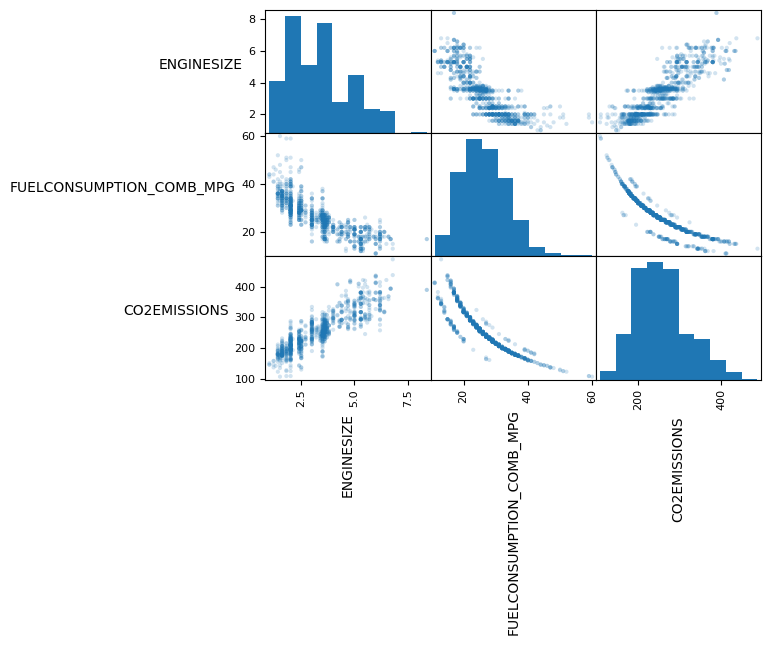

In [8]:
axes = pd.plotting.scatter_matrix(df, .2)                   # scatter matrix to visualize the relation between features
for ax in axes.flatten():                                   # for fixing the labels to be able to see them
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')
plt.show()

# we can see that the relationship between 'FUELCONSUMPTION_COMB_MPG' and 'CO2EMISSIONS' is non-linear.

## data preprocessing 

In [9]:
# slicing the data into X and Y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

first we standardize the input features so the model doesn't inadvertently favor any feature due to its magnitude.

In [10]:
# standard scaler formula = (X - mean of the feature) / the standard deviation  

def standard_scaler(X):
    # calculating the mean and standard derivation
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)

    # Handle the case where std might be 0 to avoid division by zero
    std_replaced = np.where(std == 0, 1, std)

    X_scaled = (X - mean) / std_replaced

    return X_scaled, mean, std

X_scaled, mu, sigma = standard_scaler(X)

In [11]:
print(f"X shape: {X_scaled.shape}")
print(f"y shape: {y.shape}")

X shape: (1067, 2)
y shape: (1067,)


observing the shapes of the data y is 1d array which is wrong as explained in the multiple linear regression article it must be a matrix of 1 column.

In [12]:
y = y.reshape(-1, 1) # Changes shape from (1067,) to (1067, 1)

X shape is (1067, 2). This means you have 1067 samples and 2 features.The Problem:

the mathematical equation F(x) has 3 weights $f(x) = \theta_0 + (x_1 * \theta_1) + (x_2 * \theta_2)$ so we have to add the bias to the vecorized x

In [13]:
m = X_scaled.shape[0]
X_final = np.c_[np.ones(m), X_scaled] # Adds a column of 1s at the start
# Now X_final shape will be (1067, 3)

In [20]:
print(f"X shape: {X_final.shape}")
print(f"y shape: {y.shape}")

X shape: (1067, 3)
y shape: (1067, 1)


now comes splitting the data into training and testing samples 

In [15]:

def train_test_split(X, Y, split):

    # creates a simple list of numbers from $0$ up to the number of samples you have.
    # Instead of moving the actual data around (which is heavy), we just shuffle these numbers. It’s much faster.
    indices = np.array(range(len(X)))

    # calculates how many rows will go into your "Training" bucket.
    train_size = round(split * len(X))

    # Randomize the "ID cards"
    np.random.shuffle(indices)

    # assigning the needed indices for training and the rest for testing 
    train_indices = indices[0:train_size]
    test_indices = indices[train_size:len(X)]

    # extracting the data for the X_train, X_test, Y_train and Y_test
    X_train = X[train_indices, :]
    X_test = X[test_indices, :]
    Y_train = Y[train_indices, :]
    Y_test = Y[test_indices, :]
    
    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = train_test_split(X_final, y, .8)

## the actual model

In [16]:
# first we create a class as we want the params to be kept as objects 
class MultipleLinearRegression:
    # setting up the hyper params and placeholders in the __init__ function
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.theta = None
        self.cost_history = []

    # making a fit function
    def fit(self, x, y):
        n_samples, n_features = x.shape
        # Initializing weights randomly
        self.theta = np.random.rand(n_features, 1)

        # gradient descent loop (each iteration = one gradient descent step)
        for i in range(self.n_iters):
            # 1. Calculate predictions for all samples
            predictions = np.dot(x, self.theta)
            
            # 2. Calculate errors
            error = predictions - y
            
            # 3. Calculate gradient
            gradient = (1/n_samples) * np.dot(x.T, error)
            
            # 4. Update theta
            self.theta -= (self.lr * gradient)

            cost = (1 / (2 * n_samples)) * np.sum(error ** 2)
            self.cost_history.append(cost)

    # prediction function
    def predict(self, X):
        return np.dot(X, self.theta)

## fitting the model

In [17]:
model = MultipleLinearRegression(.01, 1000)
model.fit(X_train, Y_train)

## having fun with evaluating and visualization

Final Test MSE: 531.548486426729
Learned Bias: [256.18445037]
Learned Weights: 
[[ 26.62750158]
 [-35.72446596]]


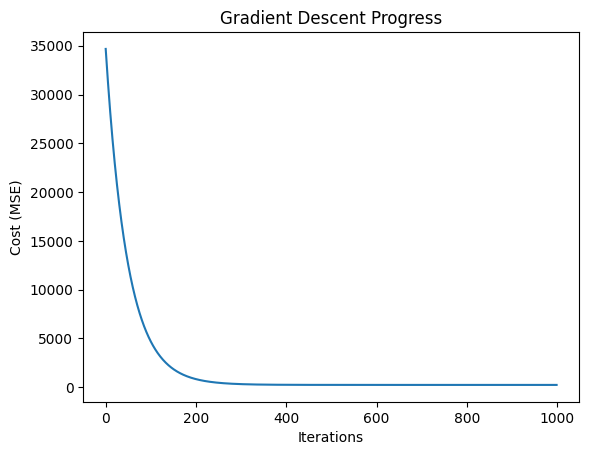

In [18]:
# Test
predictions = model.predict(X_test)

# Evaluate (Mean Squared Error)
mse = np.mean((predictions - Y_test)**2)
print(f"Final Test MSE: {mse}")
print(f"Learned Bias: {model.theta[0]}")
print(f"Learned Weights: \n{model.theta[1:]}")

# Visualize the Loss Curve (to ensure it converged)
plt.plot(model.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Progress")
plt.show()

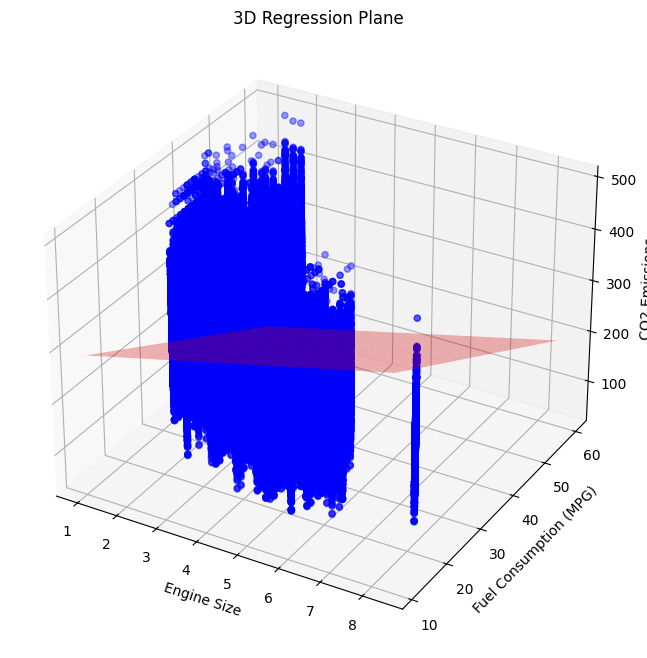

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# 1. Setup the figure and 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# 2. Plot the actual data points (Scatter)
# We use the original unscaled X and y for the axes to keep it readable
ax.scatter(X[:, 0], X[:, 1], y, color='blue', alpha=0.4, label='Actual Data')

# 3. Create a "Meshgrid" to draw the plane
# We create a range of values for both features
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 20)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 20)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)

# 4. Calculate the Plane's Z values (Predictions)
# IMPORTANT: If you trained on SCALED data, you must scale the grid points 
# before calculating Z, using the mu and sigma from your standard_scaler.
X1_scaled = (X1_grid - mu[0]) / sigma[0]
X2_scaled = (X2_grid - mu[1]) / sigma[1]

# Now apply the formula: Z = theta0 + theta1*X1 + theta2*X2
# (Note: model.theta[0] is the bias/intercept)
Z_grid = model.theta[0] + (model.theta[1] * X1_scaled) + (model.theta[2] * X2_scaled)

# 5. Plot the Surface (The "Plan")
surface = ax.plot_surface(X1_grid, X2_grid, Z_grid, color='red', alpha=0.3, label='Regression Plane')

# Labeling
ax.set_xlabel('Engine Size')
ax.set_ylabel('Fuel Consumption (MPG)')
ax.set_zlabel('CO2 Emissions')
ax.set_title('3D Regression Plane')

plt.show()